# COMP 562 Final Project Analysis

#### Authors:
Cooper Lee, James Tuong, Nathaniel Turner, Alan Vasquez

In [208]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
# %pip install mlxtend --quiet
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler

from sklearn import metrics, preprocessing
# import sklearn #need to figure out what parts of sklearn to import that we'll use

## Data Preprocessing
Loading in the dataset and splitting into test and training set (may want to do each time for the different methods)

In [209]:
dpath = "data/heart.csv"
feature_names = ["age","sex","cp","trtbps","chol","fbs","restecg","thalachh",
                                 "exng","oldpeak","slp","caa","thall", "output"]
english_feature_names = ["age", "sex", "chest pain", "resting blood pressure", "cholesterol", "fasting blood sugar", 
                         "resting electrocardiographic results", "maximum heart rate achieved", 
                        "exercise induced angina", "old peak", "slope", "number of major arteries",
                        "thall rate", "output"]

# Determined by looking at the dataset description
cat_cols = ["sex","cp","fbs","restecg", "exng","slp","caa","thall"]
con_cols = ["age", "chol","trtbps","thalachh","oldpeak"]

# Initialize Confusion Matrices
confusion_matrices = { 
}

# Read in the dataset
df = pd.read_csv("data/heart.csv")

# Counts of Output Variable
print(df[df['output'] == 0].shape[0])
print(df[df['output'] == 1].shape[0])

138
165


In [210]:
df_tree = df.copy()
df_tree = df_tree.apply(LabelEncoder().fit_transform)
X = df_tree.drop(['output'], axis=1)
y = df_tree['output'].values

y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (212, 13)
The shape of X_test is        (91, 13)
The shape of y_train is       (212, 1)
The shape of y_test is        (91, 1)


In [211]:
df_nontree = df.copy()
df_nontree = pd.get_dummies(df_nontree, columns = cat_cols, drop_first = True)
X_nt = df_nontree.drop(['output'], axis=1)
y_nt = df_nontree['output'].values

y_nt = y_nt.reshape(-1, 1)

#nontree = 'nt'
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X_nt, y_nt, test_size=0.3,
                                                    random_state=1, stratify=y)
print("The shape of X_train is      ", X_train_nt.shape)
print("The shape of X_test is       ",X_test_nt.shape)
print("The shape of y_train is      ",y_train_nt.shape)
print("The shape of y_test is       ",y_test_nt.shape)

The shape of X_train is       (212, 22)
The shape of X_test is        (91, 22)
The shape of y_train is       (212, 1)
The shape of y_test is        (91, 1)


## Data Analysis

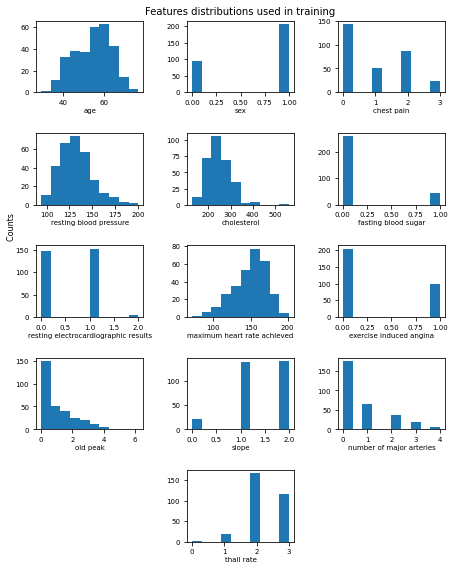

In [212]:
#Feature Distributions
heart_data = np.array([data[i] for i in feature_names[:-1]]).T
heart_attack_odds = data["output"]

fig = plt.figure(figsize=(8,12))
nrow = 35
ncol = 12
fontsize = 10
labelspan = 2
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 

plot1 = plt.subplot2grid((nrow,ncol), (0, 0), rowspan=4, colspan=3)
plot1.hist(heart_data[:,0])
plot1.set_xlabel(english_feature_names[0], fontsize=7, labelpad=labelspan)

plot2 = plt.subplot2grid((nrow,ncol), (0, 4), rowspan=4, colspan=3)
plot2.hist(heart_data[:,1])
plot2.set_xlabel(english_feature_names[1], fontsize=7, labelpad=labelspan)
plt.title("Features distributions used in training", fontsize=10)

plot3 = plt.subplot2grid((nrow,ncol), (0, 8), rowspan=4, colspan=3)
plot3.hist(heart_data[:,2])
plot3.set_xlabel(english_feature_names[2], fontsize=7, labelpad=labelspan)

plot4 = plt.subplot2grid((nrow,ncol), (6, 0), rowspan=4, colspan=3)
plot4.hist(heart_data[:,3])
plot4.set_xlabel(english_feature_names[3],fontsize=7, labelpad=labelspan)
plot4.set_ylabel("Counts                                              ", fontsize=8, labelpad=4)

plot5 = plt.subplot2grid((nrow,ncol), (6, 4), rowspan=4, colspan=3)
plot5.hist(heart_data[:,4])
plot5.set_xlabel(english_feature_names[4],fontsize=7, labelpad=labelspan)

plot6 = plt.subplot2grid((nrow,ncol), (6, 8), rowspan=4, colspan=3)
plot6.hist(heart_data[:,5])
plot6.set_xlabel(english_feature_names[5],fontsize=7, labelpad=labelspan)

plot7 = plt.subplot2grid((nrow,ncol), (12, 0), rowspan=4, colspan=3)
plot7.hist(heart_data[:,6])
plot7.set_xlabel(english_feature_names[6],fontsize=7, labelpad=labelspan)

plot8 = plt.subplot2grid((nrow,ncol), (12, 4), rowspan=4, colspan=3)
plot8.hist(heart_data[:,7])
plot8.set_xlabel(english_feature_names[7],fontsize=7, labelpad=labelspan)

plot9 = plt.subplot2grid((nrow,ncol), (12, 8), rowspan=4, colspan=3)
plot9.hist(heart_data[:,8])
plot9.set_xlabel(english_feature_names[8],fontsize=7, labelpad=labelspan)

plot10 = plt.subplot2grid((nrow,ncol), (18, 0), rowspan=4, colspan=3)
plot10.hist(heart_data[:,9])
plot10.set_xlabel(english_feature_names[9],fontsize=7, labelpad=labelspan)

plot11 = plt.subplot2grid((nrow,ncol), (18, 4), rowspan=4, colspan=3)
plot11.hist(heart_data[:,10])
plot11.set_xlabel(english_feature_names[10],fontsize=7, labelpad=labelspan)

plot12 = plt.subplot2grid((nrow,ncol), (18, 8), rowspan=4, colspan=3)
plot12.hist(heart_data[:,11])
plot12.set_xlabel(english_feature_names[11],fontsize=7, labelpad=labelspan)

plot13 = plt.subplot2grid((nrow,ncol), (24, 4), rowspan=4, colspan=3)
plot13.hist(heart_data[:,12])
plot13.set_xlabel(english_feature_names[12],fontsize=7, labelpad=labelspan)

# plt.tight_layout()
plt.savefig("heart_ft_dist.png")

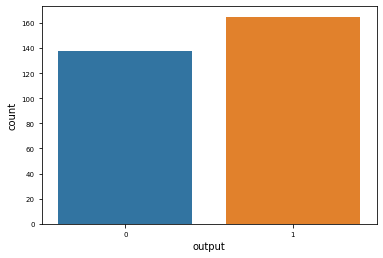

C:\Users\coopl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\coopl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


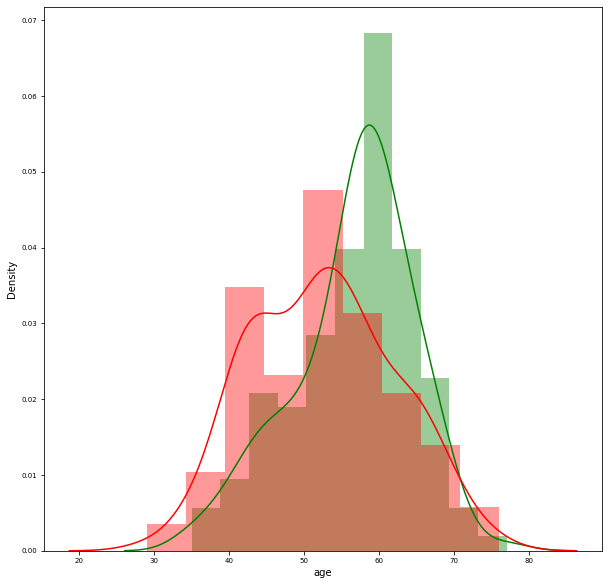

C:\Users\coopl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\coopl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


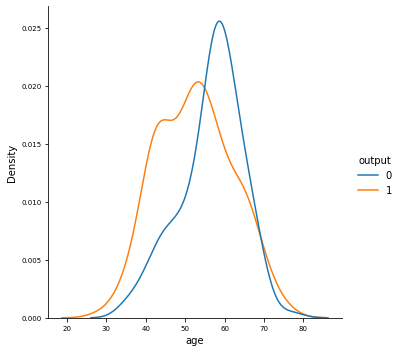

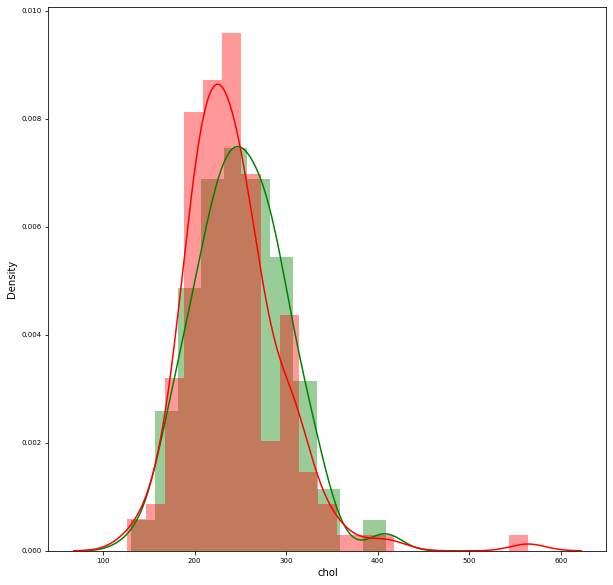

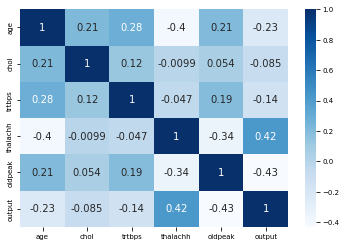

<Figure size 432x288 with 0 Axes>

In [213]:
# Plot the Count Distribution of Risk Output
sns.countplot(data=df, x='output')
plt.show()

# Plotting Age Density Distribution Plot for Risk Categories
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color="green", label="Low-Risk", kde= True)
sns.distplot(df[df['output'] == 1]["age"], color="red", label="High-Risk", kde= True)
# plt.title('Age Distribution by CVD Risk')
# plt.legend()
plt.show()

sns.displot(data=df, x="age", hue="output", kind="kde")

# Plotting  Density Distribution Plot for Risk Categories
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["chol"], color="green", label="Low-Risk", kde= True)
sns.distplot(df[df['output'] == 1]["chol"], color="red", label="High-Risk", kde= True)
# plt.title('Cholesterol Distribution by CVD Risk')
# plt.legend()
plt.show()

# Correlation Matrix Heatmap
corr_cols = ["age", "chol","trtbps","thalachh","oldpeak", "output"]
sns.heatmap(df[corr_cols].corr(), cmap="Blues", annot=True)
plt.show()
plt.savefig("heart_analysis_corr.png") # save as png

## Method 1: Binary Tree

### K-Fold Training

In [214]:
# Create Accuracy log and kfold splits
k=5
acc_score = []
roc_acc_score = []
kf = StratifiedKFold(n_splits=k)

print("The shape of X_train is      ", X_train.shape)

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train,y_train)):
    X_fld_train, X_fld_val = X_train.iloc[trn_,:-1], X_train.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train[trn_], y_train[val_]
    
    # Create Decision Tree classifer object
    clf_binary_tree = DecisionTreeClassifier(random_state=4, max_depth=4)

    # Train Decision Tree Classifer
    clf_binary_tree = clf_binary_tree.fit(X_fld_train,y_fld_train)

    #Predict the response for test dataset
    y_pred_binary_tree = clf_binary_tree.predict(X_fld_val)
    
    #Log accuracy
    acc = metrics.accuracy_score(y_fld_val, y_pred_binary_tree)
    acc_score.append(acc)
    roc_acc = roc_auc_score(y_fld_val, y_pred_binary_tree)
    roc_acc_score.append(roc_acc)
    
avg_acc_score = sum(acc_score)/k
avg_roc_acc_score = sum(roc_acc_score)/k
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('ROC Accuracy of each fold - {}'.format(roc_acc_score))
print('Avg ROC Accuracy: {}'.format(avg_roc_acc_score))

The shape of X_train is       (212, 13)
Accuracy of each fold - [0.7674418604651163, 0.627906976744186, 0.8095238095238095, 0.6904761904761905, 0.8571428571428571]
Avg accuracy : 0.7504983388704318
ROC Accuracy of each fold - [0.7565217391304349, 0.6293478260869565, 0.7940503432494279, 0.6945080091533181, 0.8558352402745995]
Avg ROC Accuracy: 0.7460526315789473


### Entire Training Set

0.8021978021978022
0.7958536585365853


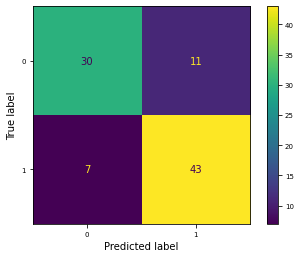

In [215]:
# Create Decision Tree classifer object
clf_binary_tree = DecisionTreeClassifier(random_state=4, max_depth=4)

# Train Decision Tree Classifer on Complete Training Set
clf_binary_tree = clf_binary_tree.fit(X_train,y_train)

#Predict the response for test dataset and print accuracy scores
y_pred_binary_tree = clf_binary_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_binary_tree))
print(roc_auc_score(y_test, y_pred_binary_tree))

cm = confusion_matrix(y_test, y_pred_binary_tree, labels=clf_binary_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_binary_tree.classes_)
disp.plot()
confusion_matrices["Binary Tree"] = confusion_matrix(y_test, y_pred_binary_tree, labels=clf_binary_tree.classes_)

## Method 2: Random Forest

### K-Fold Training

In [216]:
#Create Accuracy log and kfold splits
k=5
acc_score = []
roc_score = []
kf = StratifiedKFold(n_splits=k)

print("The shape of X_train is      ", X_train.shape)

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train,y_train)):
    X_fld_train, X_fld_val = X_train.iloc[trn_,:-1], X_train.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train[trn_], y_train[val_]
    
    # Create Random Forest Classifer object
    forest = RandomForestClassifier(criterion='gini',
                                 max_depth =8,
                                 n_estimators=10,
                                 random_state=4,
                                 n_jobs=2)

    # Train Random Forest Classifer
    forest.fit(X_fld_train, y_fld_train.ravel())

    #Predict the response for test dataset
    y_pred = forest.predict(X_fld_val)
    
    #Log accuracy
    acc = accuracy_score(y_fld_val, y_pred)
    acc_score.append(acc)
    roc_acc = roc_auc_score(y_fld_val, y_pred)
    roc_score.append(roc_acc)

avg_acc_score = sum(acc_score)/k
avg_roc_score = sum(roc_score)/k
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('ROC Accuracy of each fold - {}'.format(roc_score))
print('Avg ROC accuracy : {}'.format(avg_roc_score))

The shape of X_train is       (212, 13)
Accuracy of each fold - [0.7441860465116279, 0.7441860465116279, 0.8809523809523809, 0.8333333333333334, 0.8571428571428571]
Avg accuracy : 0.8119601328903654
ROC Accuracy of each fold - [0.7413043478260869, 0.7510869565217391, 0.8775743707093822, 0.8249427917620138, 0.8649885583524028]
Avg ROC accuracy : 0.8119794050343249


### Entire Training Set

Accuracy: 0.8571428571428570952761560874932911


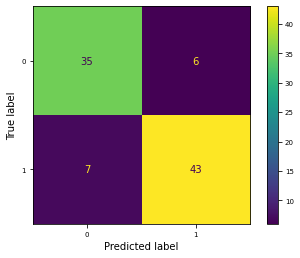

In [217]:
# Create Random Forest Classifier Objecct
forest = RandomForestClassifier(criterion='gini', max_depth = 8,n_estimators=10, random_state=4,n_jobs=2)

# Train Random Forest Classifier on Complete Training Set
forest.fit(X_train, y_train.ravel())

# Predict the Results Using the Random Forest Classifier
y_pred = forest.predict(X_test)

# Accuracy of Model Trained with Whole Training Set
print('Accuracy: %.34f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
confusion_matrices["Random Forest"] = confusion_matrix(y_test, y_pred, labels=forest.classes_)

## Method 3: Logistic Regression

### K-Fold Training

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

#Create Accuracy log and kfold splits
k=5
acc_LogReg = []
roc_LogReg = []
kf = StratifiedKFold(n_splits=k)

X_train_nt2 = X_train_nt.copy()
y_train_nt2 = y_train_nt.copy()

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train_nt,y_train_nt)):
    X_fld_train, X_fld_val = X_train_nt.iloc[trn_,:-1], X_train_nt.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train_nt[trn_], y_train_nt[val_]
    
    # instantiating the scaler
    scaler = MinMaxScaler()

    # scaling the continuous featuree
    X_fld_train[con_cols] = scaler.fit_transform(X_fld_train[con_cols])
    X_fld_val[con_cols] = scaler.fit_transform(X_fld_val[con_cols])
    
    # Create and Train  Logistic Regression Classifer
    clf = LogisticRegression(random_state=0, max_iter=1000, C=0.93).fit(X_fld_train, y_fld_train.ravel())

    #Predict the response for test dataset
    y_pred = clf.predict(X_fld_val)
    clf.predict_proba(X_fld_val)
    
    #Log accuracy
    acc = clf.score(X_fld_val, y_fld_val)
    acc_LogReg.append(acc)
    roc_acc = roc_auc_score(y_fld_val, y_pred)
    roc_LogReg.append(roc_acc)

avg_acc_score_LogReg = sum(acc_LogReg)/k
avg_roc_LogReg = sum(roc_LogReg)/k
print('Accuracy of each fold - {}'.format(acc_LogReg))
print('Avg accuracy of Logistic Regression: {}'.format(avg_acc_score_LogReg))
print('ROC Accuracy of each fold - {}'.format(roc_LogReg))
print('Avg ROC accuracy of Logistic Regression: {}'.format(avg_roc_LogReg))

Accuracy of each fold - [0.7906976744186046, 0.813953488372093, 0.9285714285714286, 0.8333333333333334, 0.8571428571428571]
Avg accuracy of Logistic Regression: 0.8447397563676633
ROC Accuracy of each fold - [0.7847826086956521, 0.8163043478260869, 0.9302059496567506, 0.8249427917620138, 0.8558352402745995]
Avg ROC accuracy of Logistic Regression: 0.8424141876430206


### Entire Training Set

Accuracy: 0.868


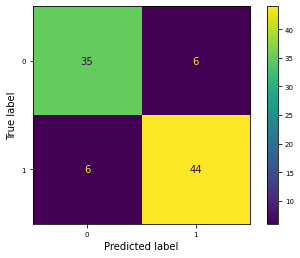

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_nt, y_train_nt.ravel())
y_pred = clf.predict(X_test_nt)

clf.predict_proba(X_test_nt)

clf.score(X_test_nt, y_test_nt)

print('Accuracy: %.3f' % accuracy_score(y_test_nt, y_pred))

cm = confusion_matrix(y_test_nt, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
confusion_matrices["Logistic Regression"] = confusion_matrix(y_test_nt, y_pred, labels=clf.classes_)

## Method 4: SVM

### K-Fold Training

In [220]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

acc_svm = []
roc_svm = []
kf=StratifiedKFold(n_splits=5)

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train_nt2,y_train_nt2)):
    X_fld_train, X_fld_val = X_train_nt2.iloc[trn_,:-1], X_train_nt2.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train_nt2[trn_], y_train_nt2[val_]
    
    ro_scaler=MinMaxScaler()
    X_fld_train=ro_scaler.fit_transform(X_fld_train)
    X_fld_val=ro_scaler.transform(X_fld_val)
        
    clf=SVC(kernel="linear")
    clf.fit(X_fld_train, y_fld_train.ravel())
    y_pred=clf.predict(X_fld_val)
    acc=accuracy_score(y_fld_val,y_pred)
    acc_svm.append(acc)
    roc_acc = roc_auc_score(y_fld_val, y_pred)
    roc_svm.append(roc_acc)

avg_acc_score_svm = sum(acc_svm)/k
avg_roc_svm = sum(roc_svm)/k
print('Accuracy of each fold - {}'.format(acc_svm))
print('Avg accuracy of Linear SVM: {}'.format(avg_acc_score_svm))
print('ROC Accuracy of each fold - {}'.format(roc_svm))
print('Avg ROC accuracy of Linear SVM: {}'.format(avg_roc_svm))

Accuracy of each fold - [0.7906976744186046, 0.813953488372093, 0.8809523809523809, 0.8333333333333334, 0.8809523809523809]
Avg accuracy of Linear SVM: 0.8399778516057586
ROC Accuracy of each fold - [0.7782608695652173, 0.8130434782608696, 0.8821510297482836, 0.8249427917620138, 0.8775743707093822]
Avg ROC accuracy of Linear SVM: 0.8351945080091534


### Entire Training Set

Accuracy: 0.813


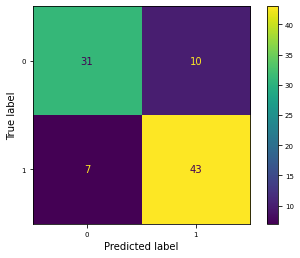

In [221]:
#Train Linear Kernel SVM on entire training dataset
ro_scaler=MinMaxScaler()
X_train_nt=ro_scaler.fit_transform(X_train_nt)
X_test_nt=ro_scaler.transform(X_test_nt)

clf=SVC(kernel="linear")
clf.fit(X_train_nt, y_train_nt.ravel())
y_pred=clf.predict(X_test_nt)
print('Accuracy: %.3f' % accuracy_score(y_test_nt, y_pred))
cm = confusion_matrix(y_test_nt, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
confusion_matrices["SVM"] = confusion_matrix(y_test_nt, y_pred, labels=clf.classes_)


## Confusion Matrices

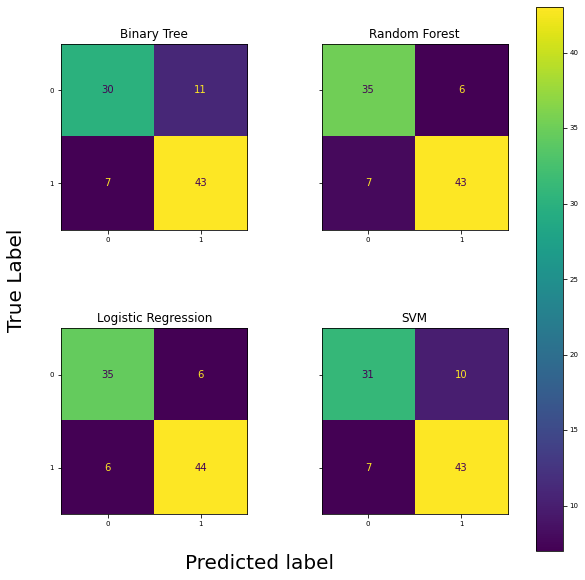

In [222]:
confusion_matrices.items()

axesIndices = []

for i in range(2):
    for j in range(2):
        axesIndices.append([i, j])
        
#Build 2x2 Plot
f, axes = plt.subplots(2, 2 ,figsize=(10, 10), sharey='row')

#Get 2d indices of subplots
axesIndices = []
for i in range(2):
    for j in range(2):
        axesIndices.append([i, j])

#Plot confusion matrices
for k, (key, cf_matrix) in enumerate(confusion_matrices.items()):
    #y_pred = classifier.fit(X_train, y_train).predict(X_test)
    #cf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(cf_matrix, display_labels=clf.classes_)
    disp.plot(ax=axes[axesIndices[k][0], axesIndices[k][1]])
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
        
#Plot labels and show
f.text(0.4, 0.1, 'Predicted label', ha='center', size=20)
plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.text(.05, .5, 'True Label', va='center', rotation=90, size=20)
f.colorbar(disp.im_, ax=axes)
plt.savefig("Confusion_Matrices.png")